# Введение в DS на УБ и МиРА (2022)

## Домашнее задание #4: Линейная регрессия

### Дедлайн: 10 июня 2022 года, 23:59

**Правила игры**

1. Домашнее задание состоит из трёх частей, которые оцениваются в 2 -- 4 -- 4 балла. Все пункты в пределах одной части имеют одинаковый вес.

2. Решения принимаются до **10 июня 2022 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, **не проверяются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

3. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/vX7_k1kZ).

4. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

5. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

Для проверки гипотез используйте ваш любимый уровень значимости! 

---

В этом задании нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. В качестве зависимой переменной возьмём температуру воздуха в градусах Цельсия (`Temperature (C)`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, все коэффициенты могут быть не значимы), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные (то есть как независимые наблюдения в пространстве).

### Часть 1: Предобработка данных (2 балла)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 
%matplotlib inline

**Задание 1.** Загрузите данные из файла `weatherHistory.csv`. Выведите первые 5 строк таблицы.

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Задание 2.** Изучите статью о том, что такое [apparent temperature](https://www.kxan.com/weather/difference-between-temperature-and-feels-like-temperature/) (также называемая "feels-like temperature" и "heat index"). Удалите какую-то переменную из набора данных и поясните, почему вы её удалили (помните о том, какая переменная будет целевой). Также удалите переменные:
- `Formatted Date` (потому что договорились, что не обращаем внимания на даты).
- `Daily Summary` (будем использовать просто `Summary`). 

In [3]:
df = df.drop(columns='Apparent Temperature (C)') # удалим Apparent Temperature (C) - это то, как ощущается человеком температура. Ощущения человека ни как не смогут повлять на саму температуру воздуха.
df = df.drop(columns='Formatted Date')
df = df.drop(columns='Daily Summary')

**Задание 3.** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [4]:
df.isnull().sum()

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [5]:
# 517 пропущенных значений есть в переменной Precip Type. Удалим их:
df = df.dropna()

**Задание 4.** В данных есть одна числовая переменная, которая не несёт информации для предсказания целевой переменной. Найдите эту переменную, поясните ваш выбор и удалите её. 

In [6]:
df['Loud Cover'].describe() # удалим loud Cover, так как все значения переменной равняются 0.0

count    95936.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Loud Cover, dtype: float64

In [7]:
df = df.drop(columns='Loud Cover')

**Задание 5.** Постройте диаграммы рассеяния всех числовых переменных против целевой (для этого используйте какой-то метод из `seaborn`). Есть ли переменные, для которых наблюдается очевидная нелинейная зависимость?

**Подсказка:** это пригодится для частей 2 и 3.

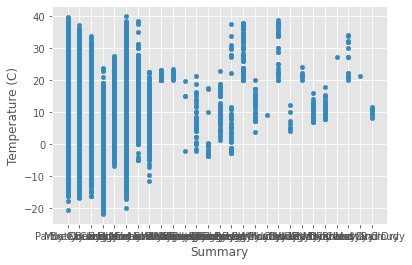

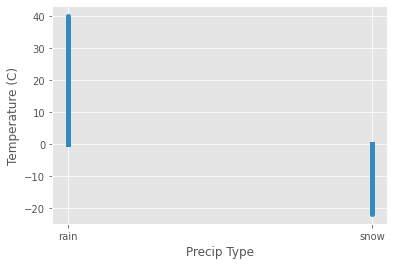

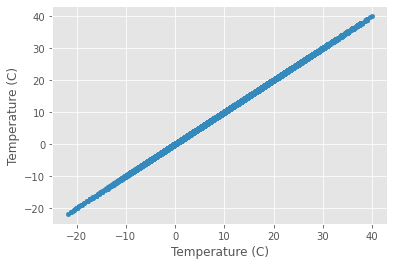

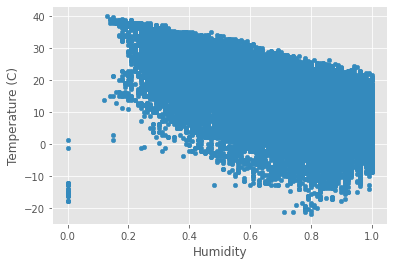

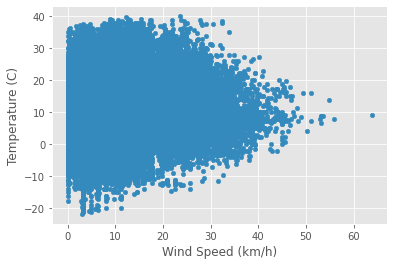

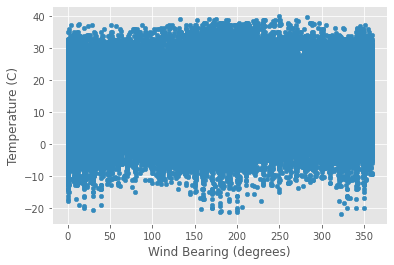

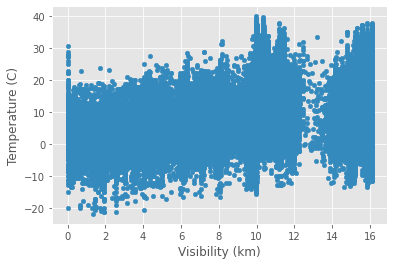

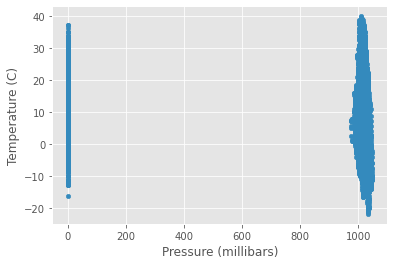

In [8]:
for idx, feature in enumerate(df.columns):
    df.plot(feature, 'Temperature (C)', kind="scatter")

Нелинейная зависимость наблюдается для переменных: Wind Bearing (degrees)
Остальные количественные перепенные имеют приблизитульную линейную зависимость, но там все очень размыто.
В катеогориальной переменной Precip Type нет зависимостей, а в Summary немного есть, но опять же, сильно размыто.

Таже обратная линейная зависимость с целевой переменной есть у переменной Humidity

**Задание 6.** Преобразуйте категориальные переменные при помощи One Hot Encoding (то есть переведите их в дамми-переменные).

In [9]:
# Этап 1: преобразуем переменную Precip Type:
pt_dummies = pd.get_dummies(df['Precip Type'])
df = pd.concat([df, pt_dummies], axis=1)

# Этап 2: преобразуем переменную Summary:
summary_dummies = pd.get_dummies(df['Summary'])
df = pd.concat([df, summary_dummies], axis=1)

# Этап 3: удалим не нужные колонки:
df = df.drop(columns='Precip Type')
df = df.drop(columns='Summary')

df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),rain,snow,Breezy,Breezy and Dry,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Задание 7.** Выведите корреляционную матрицу переменных. Какие переменные лучше всего коррелируют с целевой (назовите три)? 

**Подсказка:** это пригодится для частей 2 и 3.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Temperature (C)                      95936 non-null  float64
 1   Humidity                             95936 non-null  float64
 2   Wind Speed (km/h)                    95936 non-null  float64
 3   Wind Bearing (degrees)               95936 non-null  float64
 4   Visibility (km)                      95936 non-null  float64
 5   Pressure (millibars)                 95936 non-null  float64
 6   rain                                 95936 non-null  uint8  
 7   snow                                 95936 non-null  uint8  
 8   Breezy                               95936 non-null  uint8  
 9   Breezy and Dry                       95936 non-null  uint8  
 10  Breezy and Foggy                     95936 non-null  uint8  
 11  Breezy and Mostly Cloudy    

In [11]:
# Некоторые названия переменных написано с пробелом. Это не удобно. Модно их переименовать
df.rename(columns={'Pressure (millibars)': 'Pressure_millibars', 'Wind Speed (km/h)': 'WindSpeedkm', 'rain': 'Rrain', 'Temperature (C)': 'Temperature', 'Visibility (km)': 'Visibility', 'Partly Cloudy': 'PartlyCloudy', 'Dry and Partly Cloudy': 'DryandPartlyCloudy', 'Mostly Cloudy': 'MostlyCloudy'}, inplace=True)

var_all = ['Humidity', 'WindSpeedkm', 'Wind Bearing (degrees)', 'Visibility', 'Pressure_millibars','Rrain', 'snow', 'Breezy', 'Breezy and Dry', 'Breezy and Foggy', 'Breezy and Mostly Cloudy', 'Breezy and Overcast', 'Breezy and Partly Cloudy', 'Clear', 'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry', 'Dry and Mostly Cloudy', 'DryandPartlyCloudy', 'Foggy', 'Humid and Mostly Cloudy', 'Humid and Overcast', 'Humid and Partly Cloudy', 'Light Rain', 'MostlyCloudy', 'Overcast', 'PartlyCloudy', 'Rain', 'Windy', 'Windy and Dry', 'Windy and Foggy', 'Windy and Mostly Cloudy', 'Windy and Overcast', 'Windy and Partly Cloudy']

target = 'Temperature'

df[var_all+[target]].corr()

,Humidity,WindSpeedkm,Wind Bearing (degrees),Visibility,Pressure_millibars,Rrain,snow,Breezy,Breezy and Dry,Breezy and Foggy,...,Overcast,PartlyCloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy,Temperature
Humidity,1.000000,-0.224569,0.000814,-0.370511,0.005375,-0.232622,0.232622,-0.011769,-0.007833,0.019885,...,0.239445,-0.309874,0.011068,-0.007575,-0.008163,0.005449,-0.013161,-0.002897,-0.027829,-0.632148
WindSpeedkm,-0.224569,1.000000,0.104366,0.100801,-0.049453,0.067771,-0.067771,0.073173,0.010732,0.062587,...,0.080466,-0.070561,-0.007387,0.041382,0.013736,0.031139,0.089196,0.101960,0.129135,0.008304
Wind Bearing (degrees),0.000814,0.104366,1.000000,0.048900,-0.011629,0.042142,-0.042142,0.010055,0.001578,-0.004784,...,-0.016621,0.016422,0.002309,0.011245,-0.001128,-0.001955,0.013149,0.011457,0.026489,0.029937
Visibility,-0.370511,0.100801,0.048900,1.000000,0.061011,0.316483,-0.316483,-0.004465,-0.000294,-0.040006,...,-0.119702,0.244970,-0.020997,0.000766,-0.000294,-0.013086,0.003649,-0.002886,0.007105,0.393719
Pressure_millibars,0.005375,-0.049453,-0.011629,0.061011,1.000000,-0.009271,0.009271,-0.088882,0.000508,0.000942,...,0.009493,0.059333,0.001233,-0.068195,0.000469,0.000486,-0.003800,0.000609,-0.011239,-0.005253
Rrain,-0.232622,0.067771,0.042142,0.316483,-0.009271,1.000000,-1.000000,-0.008331,0.001145,-0.040020,...,-0.066266,0.127585,0.003620,0.003238,0.001145,-0.002836,0.006773,0.003095,0.009372,0.563503
snow,0.232622,-0.067771,-0.042142,-0.316483,0.009271,-1.000000,1.000000,0.008331,-0.001145,0.040020,...,0.066266,-0.127585,-0.003620,-0.003238,-0.001145,0.002836,-0.006773,-0.003095,-0.009372,-0.563503
Breezy,-0.011769,0.073173,0.010055,-0.004465,-0.088882,-0.008331,0.008331,1.000000,-0.000077,-0.000453,...,-0.010822,-0.016646,-0.000242,-0.000217,-0.000077,-0.000153,-0.000453,-0.000514,-0.000627,-0.009966
Breezy and Dry,-0.007833,0.010732,0.001578,-0.000294,0.000508,0.001145,-0.001145,-0.000077,1.000000,-0.000062,...,-0.001472,-0.002265,-0.000033,-0.000029,-0.000010,-0.000021,-0.000062,-0.000070,-0.000085,0.003093
Breezy and Foggy,0.019885,0.062587,-0.004784,-0.040006,0.000942,-0.040020,0.040020,-0.000453,-0.000062,1.000000,...,-0.008712,-0.013400,-0.000195,-0.000174,-0.000062,-0.000123,-0.000365,-0.000414,-0.000505,-0.024854


По таблице сложно посмотреть корреляционные зависимости, поэтому построим тепловую матрицу

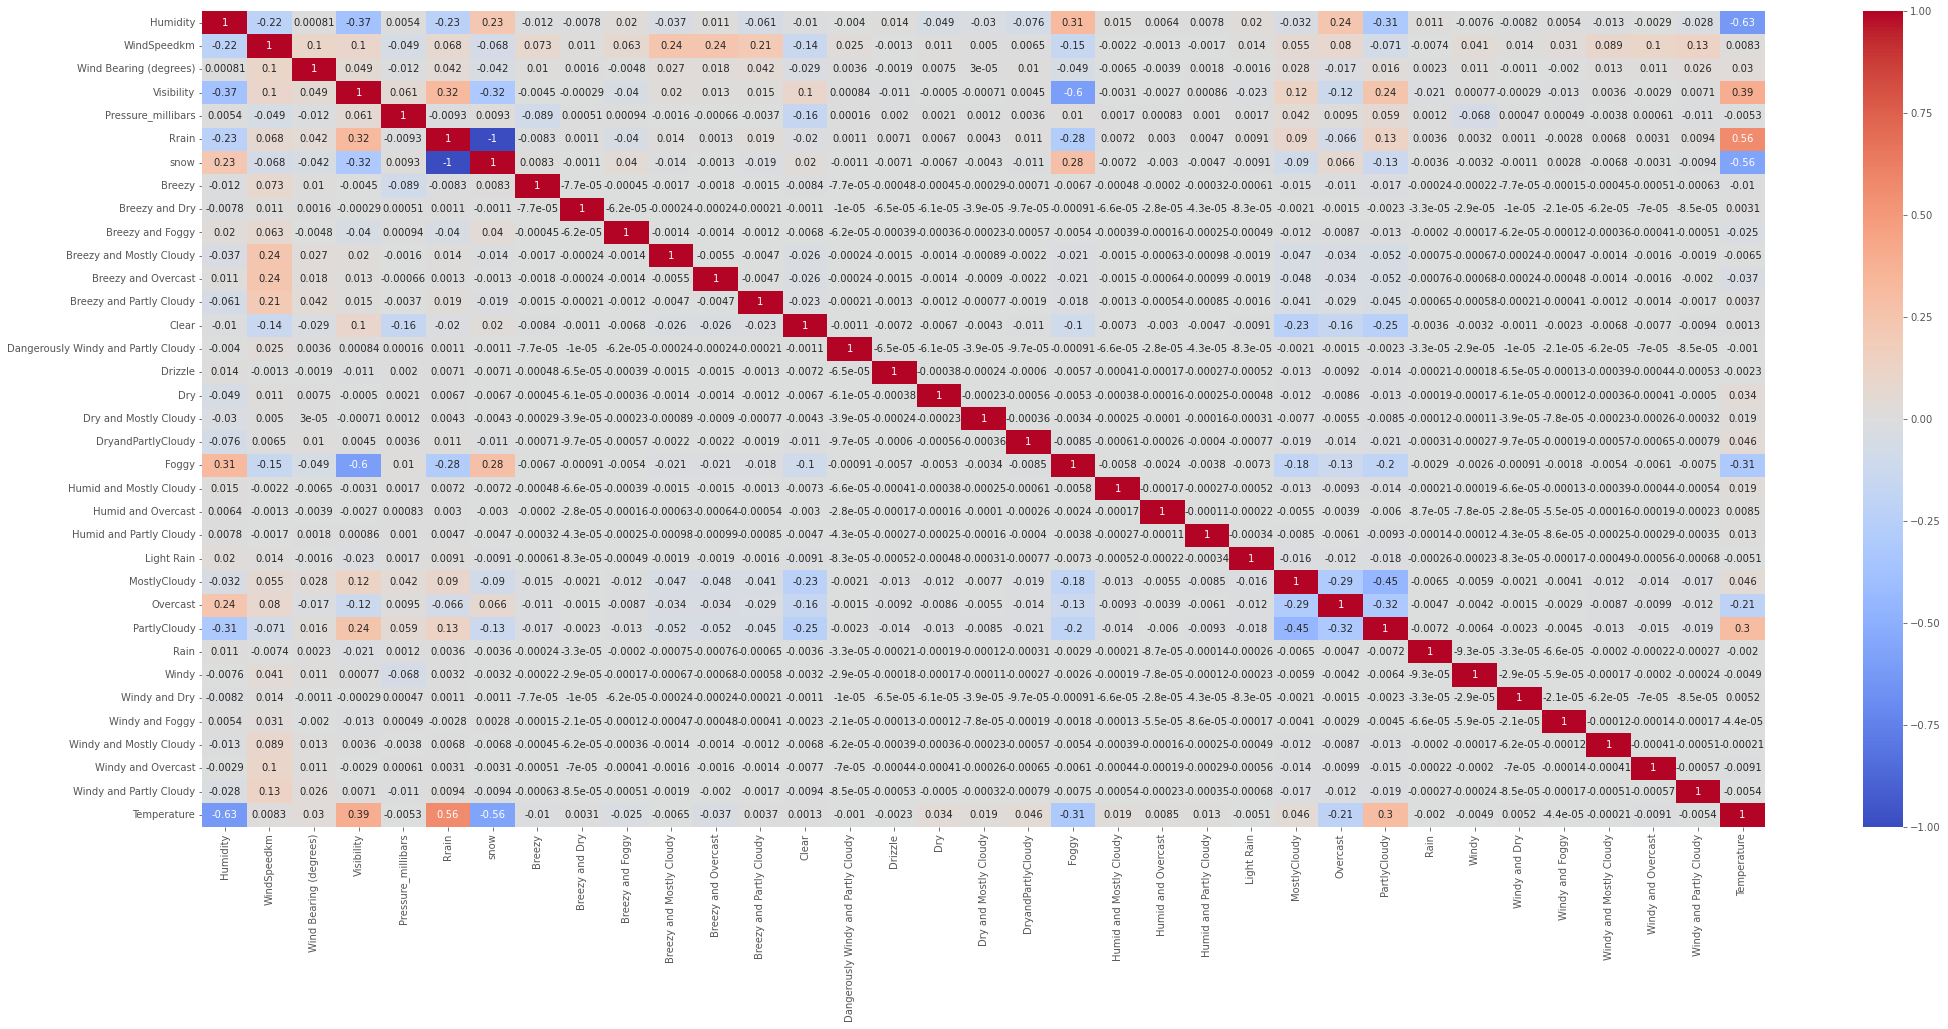

In [12]:
fig, scatter = plt.subplots(figsize = (35,15))
heatmap = sns.heatmap(df[var_all+['Temperature']].corr(), cmap='coolwarm', annot = True)

С целевой переменной лучше всего коррелируют: 
    
    Humidity : -0.64
    Rrain : 0.55
    snow : -0.55 

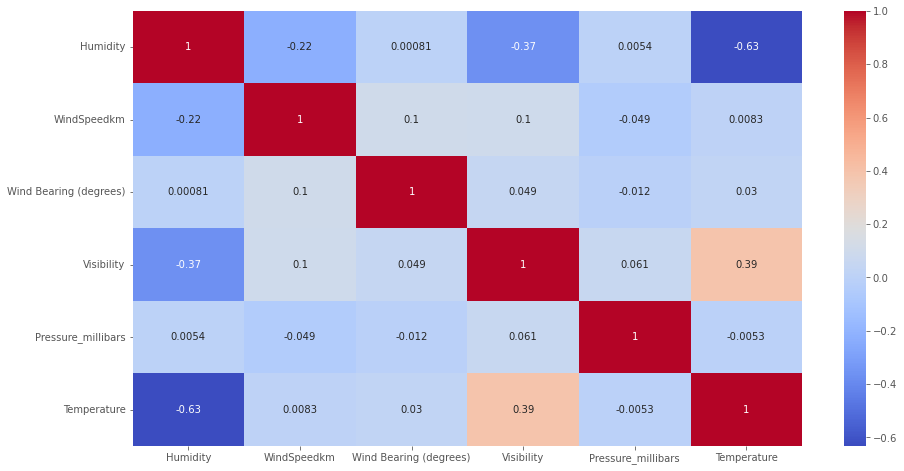

In [13]:
#Также можно постоить корреляционную матрицу без дамми переменных:
var_Not_all = ['Humidity', 'WindSpeedkm', 'Wind Bearing (degrees)', 'Visibility', 'Pressure_millibars']
fig, scatter = plt.subplots(figsize = (15,8))
heatmap = sns.heatmap(df[var_Not_all+['Temperature']].corr(), cmap='coolwarm', annot = True)

Теперь, с целевой переменной лучше всего коррелируют: 

    Humidity : -0.64
    Visibility (km) : 0.38
    Pressure_millibars : -0.3

**Задание 8.** Разделите данные на регрессоры (`X`) и целевую переменную (`y`). Если всё сделано правильно, то `X` и `y` должны иметь размеры, указанные ниже.

In [14]:
X = df.drop('Temperature', axis=1)
y = df['Temperature']
print('X:', X.shape)
print('y:', y.shape)

X: (95936, 34)
y: (95936,)


In [15]:
X.info() #все признаки числовые, значит модель сможет обучиться

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Humidity                             95936 non-null  float64
 1   WindSpeedkm                          95936 non-null  float64
 2   Wind Bearing (degrees)               95936 non-null  float64
 3   Visibility                           95936 non-null  float64
 4   Pressure_millibars                   95936 non-null  float64
 5   Rrain                                95936 non-null  uint8  
 6   snow                                 95936 non-null  uint8  
 7   Breezy                               95936 non-null  uint8  
 8   Breezy and Dry                       95936 non-null  uint8  
 9   Breezy and Foggy                     95936 non-null  uint8  
 10  Breezy and Mostly Cloudy             95936 non-null  uint8  
 11  Breezy and Overcast         

**Задание 8.** Похоже ли распределение целевой переменной на нормальное? Поясните, почему важно, чтобы распределение `y` было похоже на нормальное.

<AxesSubplot:>

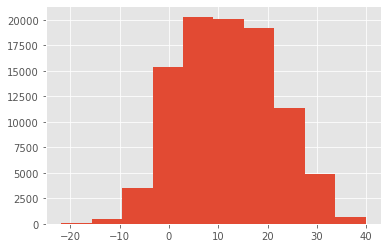

In [16]:
df[target].hist()

Распределение целевой переменной близко к нормальному. Это важно, так как в дальнейшем мы будем строить интрапритационную модель. чтобы ее построить нужно будет использовать z-тест или t-тест. эти тесты можно применять только если выборка распределена нормально.

### Часть 2: Построение объясняющей модели (4 балла)

**Задание 9.** На основании предыдущего анализа и логических соображений выберите шесть регрессоров (не считая константный), которые будут включены в объясняющую модель. Помните, что когда мы строим объясняющую модель, выбор переменных должнен быть обоснован (не достаточно использовать предыдущий анализ, выбор каждой переменной должен иметь теоретическое или логическое обоснование). В качестве регрессоров можно брать переменные из `X` или преобразования над ними (`Humidity` и `Humidity`$^2$ будем считать разными регрессорами). 

Создайте ячейку Markdown ниже и запишите в неё функциональный вид модели, которую вы будете оценивать. Поясните выбор регрессоров (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации) и, если используете, выбор нелинейных преобразований над ними.

**Пример ответа:** я строю модель

$$
y_i = \beta_0 + \beta_1 Humidity + \beta_2 Humidity^2 + \beta_3 Humidity^3 + \beta_4 Visibility (km) + \beta_5 Visibility (km) ^ 2 + \beta_6 Summary\_Breezy + \varepsilon_i
$$

Обоснование выбора переменных:
- $Humidity$ – потому что мне кажется, что влажность воздуха влияет на температуру <так-то и так-то>.
- $Humidity^2$ – потому что ...
- ...

##### Моя модель:

𝑦𝑖=𝛽0 + 𝛽1 Rrain + 𝛽2 WindSpeedkm + 𝛽3 PartlyCloudy + 𝛽4 Humidity + 𝛽5 MostlyCloudy + 𝛽6 Overcast + 𝜀𝑖
 
##### Объяснение выбора:
При выборе переменных в основу брались данные по корреляции. 
Первые три переменные (Rrain и Partly Cloudy) были выбраны, так как среди остальных имеют самую сильную корреляционную связь с целевой переменной. Однако по той же аналогии не была выбрана переменная Visibility, так как не сможет сильно повлять на изменение температуры. Хоть данная переменная и имеет высокую корреляцию с целевой, то это потому что температура оказывает влияние на видимость, ил иже не сама тепрература, а погодные условия, сопровождаемые температурой. Поэтому  Visibility не входит в мою модель.   

WindSpeedkm - так как скорость ветра вляет на изменение температуры, если ветер дует сильно, то не важно какой он температуры, все равно будет прохладнно. как правило в безветренных местах температура выше, чем на вершине горы, где сильный ветер. 

Humidity - влажность также способна повлять на температуру. сырость часто сопровождается холодом и грустным настроением.  

MostlyCloudy - облачность способна изменить температуру воздуха, так как облака закрывают землю от солнца и не дают ей прогреться. а солнце как раз повышает температуру воздуха: нет солнца - холодно .

Overcast - пасмурную погоду приности ветрер, а дождь охлаждает воздух. когда идет дождь, лучи слонца не смогут поддержатьтемпературу воздуха на прежнем уровне, поэтому можно утверждать, что пасмурная погода вляет на изменение температуры. 

**Задание 10.** Выделите выбранные признаки в переменную `X1`. 

In [17]:
X1 = df[['Rrain', 'WindSpeedkm', 'PartlyCloudy', 'MostlyCloudy', 'Humidity', 'Overcast']]

**Задание 11.** Оцените модель при помощи МНК (минимзации MSE). Прокомментируйте значимость коэффициентов.

In [18]:
import statsmodels.formula.api as smf

# Этап 1: зададим модель в виде строки:
lm = smf.ols(formula='Temperature ~ Rrain + WindSpeedkm + PartlyCloudy + MostlyCloudy + Overcast + Humidity', data=df).fit()

# Этап 2: выводим коэффициенты
lm.params

Intercept       20.693685
Rrain           13.214514
WindSpeedkm     -0.188397
PartlyCloudy     1.658797
MostlyCloudy     0.672911
Overcast        -0.220018
Humidity       -26.075042
dtype: float64

Оценка бетта 0 с крышкой (Intercept) равняется 20, Rrain =  13.2, WindSpeedkm = -0.18, PartlyCloudy = 1.6, MostlyCloudy = 0.6, Humidity = -26, Overcast = -0.2

**Задание 12.** Поясните, как каждый регрессор влияет на зависимую переменную 
1. математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и 
2. содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

1. Объяснение математически:
    Анализ дамми переменных:
    
      1. При сравнении наличия Rrain (дождь) с тем, когда Rrain нет, температура становится выше на 13.214514 градусов.
      2. При сравнении наличия PartlyCloudy с тем, когда PartlyCloudy нет, температура становится выше на 1.658797 градусов. 
      3. При сравнении наличия MostlyCloudy с тем, когда MostlyCloudy нет, температура становится выше на 0.672911 градусов.
      4. При сравнении наличия Overcast с тем, когда Overcast нет, температура становится ниже на -0.220018 градусов.
       
    Анализ остальных переменных:
    
       1. При увеличении WindSpeedkm, например, на 30%, температура изменится на 0.3*(-0.188397) = -0.05652, значит температура снизится примерно на 0 градусов. 
       2. При увеличении Humidity, например, на 15%, температура изменится на 0.15%*(-26.075042) = -3.91126, значит температура снизится примерно на 4 градуса. 
       
2. Содержательное объяснение:
   1. Появление Rrain (дождь) возможно только в теплую погоду, скорее всего это связано с тем, что когда температура равна или выше 0 грудусов, возможен дождь, а когда ниже 0 градусов, возможен снег.
   2. Высокая WindSpeedkm (скорость ветра) снижает температуру, так как ветер охлаждает воздух и тепло снижается (отрицательное влияние).
   3. PartlyCloudy (немного облачно) - когда на улице есть немного облаков, то они совсем не много скрывают солнечный свет, таким образом создается некий барьер (лучи тепла все еще доходят до земли) и тепло, оставшееся под облаками, не может подняться выше облаков, тем самым остается у земли -> температура растет.
   4. MostlyCloudy (очень облачно) - когда на улице есть много облаков, то они сильно скрывают солнечный свет, и лучи тепла не доходят до земли, то есть появляется тень и температура снижается.
   5. Появление Overcast (пасмурная погода) означает то, что в скором времени начнется дождь и ветер, а облака скроют замлю от света. значит, температура упадет (отрицательное влияние)
   6. Humidity (влажность) снижает температуру, так как в воздухе много холодной влакт, которая охлаждает градус (отрицательное влияние)

**Задание 13.** Рассчитайте $R^2$ и MSE на выборке `X1`. Прокомментируйте качество подгонки регрессии.

In [19]:
#Поскольку выборка Х1 содержит в себе все переменные, которые входят в модель, то можно воспользоваться методом summary, чтобы увидеть автоматически посчитанный R2
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 2.488e+04
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:29:16   Log-Likelihood:            -3.0780e+05
No. Observations:               95936   AIC:                         6.156e+05
Df Residuals:                   95929   BIC:                         6.157e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.6937      0.126    163.841      0.000      20.446      20.941
Rrain           13.2145      0.064    206.536      0.000      13.089      13.340
WindSpeedkm     -0.1884      0.003    -64.566      0.000      -0.194      -0.183
PartlyCloudy     1.6588      0.057     28.951      0.000       1.546       1.771
MostlyCloudy     0.6729      0.057     11.841      0.000       0.562       0.784
Overcast        -0.2200      0.064     -3.453      0.001      -0.345      -0.095
Humidity       -26.0750      0.112   -233.069      0.000     -26.294     -25.856
==============================================================================
Omnibus:                     1331.214   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1286.680
Skew:                          -0.255   Prob(JB):                    3.99e-280
Kurtosis:                       2.752   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В данной модели R-squared = 0.609, значит можно будет сделать модель лучше, чтобы R-squared еще больше приблизился к 1. 
1. Коэффициент при константе значим( P>|t| ): Intercept = 0.000 = 0%  < 1%,5%,10% уровней значимости
2. Коэффициент при Rrain значим: Rrain = 0.000 = 0%  < 1%,5%,10% уровней значимости
3. Коэффициент при WindSpeedkm значим: WindSpeedkm = 0.000 = 0%  < 1%,5%,10% уровней значимости
4. Коэффициент при PartlyCloudy значим: PartlyCloudy = 0.000 = 0%  < 1%,5%,10% уровней значимости
5. Коэффициент при MostlyCloudy значим: MostlyCloudy = 0.000 = 0%  < 1%,5%,10% уровней значимости
6. Коэффициент при Overcast значим: Overcast = 0.001 = 0.1%  < 1%,5%,10% уровней значимости
7. Коэффициент при Humidity значим: Humidity = 0.000 = 0%  < 1%,5%,10% уровней значимости

Так как R-squared = 0.609, то значит, моя модель объясняет 60% разброса значений 

In [20]:
from statsmodels.tools.eval_measures import mse 

# Считаем MSE:
qwa = lm.predict(X1)
a = mse(y, qwa)
print(a)

# https://tedboy.github.io/statsmodels_doc/generated/statsmodels.tools.eval_measures.html

35.83467940699869


Получилось, что MSE по выборке Х1 равняется 35.83

### Часть 3: Построение предсказательной модели (4 балла)

В предыдущей части мы хотели объяснить $y$ при помощи каких-то регрессоров, которые мы отбирали из теоретико-логических соображений. Теперь поставим другую задачу: мы не хотим ничего объяснять, а хотим только хорошо предсказывать $y$ по новым наблюдениям. Код ниже поделит выборку (`X`, `y`) на обучающую (`X_train`, `y_train`), на которой будем *оценивать* модель, и *тестовую* (`X_test`, `y_test`), на которой будем предсказывать. 

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задание 14.** Сохраните в переменные `X_train_1` и `X_test_1` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9).

Оцените модель на выборке `X_train_1`. Сделайте предсказания на выборках `X_train_1` (то есть обучающей) и `X_test_1` (то есть тестовой). Рассчитайте `MAE` на этих выборках.

In [22]:
# Этап 1: сохраним переменные
X_train_1 = X_train[['Rrain', 'WindSpeedkm', 'PartlyCloudy', 'MostlyCloudy', 'Humidity', 'Overcast']]
X_test_1 = X_test[['Rrain', 'WindSpeedkm', 'PartlyCloudy', 'MostlyCloudy', 'Humidity', 'Overcast']]

In [23]:
# Этап 2: обучение
from sklearn.linear_model import LinearRegression 
lm1 = LinearRegression()        
lm1.fit(X_train_1, y_train)

# выводим оценку
print(lm1.intercept_)  
list(zip(X1, lm1.coef_))

20.786807918557454


[('Rrain', 13.207631657485951),
 ('WindSpeedkm', -0.18915066791670432),
 ('PartlyCloudy', 1.641623233553172),
 ('MostlyCloudy', 0.6208794782244234),
 ('Humidity', -26.147648980331436),
 ('Overcast', -0.25483384862973224)]

In [24]:
# Этап 3: 
#предсказание для обучающей выборки:
lm1_train_predskaz = lm1.predict(X_train_1)

# предсказание для тестовой выборки:
lm1_test_predskaz = lm1.predict(X_test_1)

print(f'lm1_train_predskaz =', lm1_train_predskaz)
print(f'lm1_test_predskaz =', lm1_test_predskaz)

lm1_train_predskaz = [ 9.95041684 17.60027231 10.56059026 ... 14.29272502 -1.82014793
 11.58641105]
lm1_test_predskaz = [13.36624052 11.50324955 16.36387341 ... 17.97504003 -4.75093997
 -1.44595094]


In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [26]:
# Этап 4: 
#считаем MAE для обучающей выборки:
MAE_LM1_train = mean_absolute_error(y_train, lm1.predict(X_train_1))

#считаем MAE для тестовой выборки:
MAE_LM1_test = mean_absolute_error(y_test, lm1.predict(X_test_1))

print(f'MAE_LM1_train =', MAE_LM1_train)
print(f'MAE_LM1_test =', MAE_LM1_test)

MAE_LM1_train = 4.914871105356919
MAE_LM1_test = 4.923236537874295


**Задание 15.** Теперь сохраните в переменные `X_train_2` и `X_test_2` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9) и ещё какие-то признаки (количество выберите на ваш вкус, главное, чтобы всего признаков было больше, чем в `X1`). Оцените модель на выборке `X_train_2`. Сделайте предсказания на выборках `X_train_2` (то есть обучающей) и `X_test_2` (то есть тестовой). Рассчитайте `MAE` на этих выборках. Удалось ли повысить качество на обучающей выборке? А на тестовой? Поясните. 

В качестве новых признаков добавим в модель переменные Visibility и snow, так как они имеют очень высокую корреляцию с целевой переменной

In [27]:
# Этап 1: сохраним переменные
X2 = ['Rrain', 'WindSpeedkm', 'PartlyCloudy', 'MostlyCloudy', 'Humidity', 'Overcast', 'Visibility', 'snow', 'Pressure_millibars']
X_train_2 = X_train[['Rrain', 'WindSpeedkm', 'PartlyCloudy', 'MostlyCloudy', 'Humidity', 'Overcast', 'Visibility', 'snow', 'Pressure_millibars']]
X_test_2 = X_test[['Rrain', 'WindSpeedkm', 'PartlyCloudy', 'MostlyCloudy', 'Humidity', 'Overcast', 'Visibility', 'snow', 'Pressure_millibars']]

In [28]:
# Этап 2: обучим модель на выборке X_train_2
lm2 = LinearRegression()        
lm2.fit(X_train_2, y_train)
# выводим оценку
print(lm2.intercept_)  
list(zip(X2, lm2.coef_))

26.84766224822586


[('Rrain', 6.397008210526787),
 ('WindSpeedkm', -0.19293431049259357),
 ('PartlyCloudy', 1.2929976128987035),
 ('MostlyCloudy', 0.3145191962858986),
 ('Humidity', -25.36308757701889),
 ('Overcast', -0.41563331391212394),
 ('Visibility', 0.14833259724128578),
 ('snow', -6.397008210526842),
 ('Pressure_millibars', -0.0011335616793646253)]

In [29]:
# Этап 3: делаем предсказание

#предсказание для обучающей выборки:
lm2_train_predskaz = lm2.predict(X_train_2)

# предсказание для тестовой выборки:
lm2_test_predskaz = lm2.predict(X_test_2)

print(f'lm2_train_predskaz =', lm2_train_predskaz)
print(f'lm2_test_predskaz =', lm2_test_predskaz)

lm2_train_predskaz = [ 9.92582984 18.36579623 10.54019826 ... 14.08095021 -2.03137892
 10.83606615]
lm2_test_predskaz = [13.98017467 12.32689091 16.87647847 ... 17.7785511  -4.39863942
 -0.38023099]


In [30]:
# Этап 4: 
# считаем MAE для обучающей выборки:
MAE_LM2_train = mean_absolute_error(y_train, lm2.predict(X_train_2))

#для тестовой выборки
MAE_LM2_test = mean_absolute_error(y_test, lm2.predict(X_test_2))

print(f'MAE_LM2_train =', MAE_LM2_train)
print(f'MAE_LM2_test =', MAE_LM2_test)

MAE_LM2_train = 4.882262444043438
MAE_LM2_test = 4.896096923848042


Поле того, как были добавлены езще два признака MAE немного снизился:

    MAE_LM1_train = 4.914871105356919
    MAE_LM1_test = 4.923236537874295
    
    MAE_LM2_train = 4.882842330337466
    MAE_LM2_test = 4.900166991461069

Это говорит о том, что модель стала немного точнее

**Задание 16.** Прокомментируйте значимость коэффициентов модели, оценённой на `X_train_2`.

#### Шаг 1: считаем коэффициенты линейной регрессии:

In [31]:
print(lm2.intercept_)  
list(zip(X2, lm2.coef_))

26.84766224822586


[('Rrain', 6.397008210526787),
 ('WindSpeedkm', -0.19293431049259357),
 ('PartlyCloudy', 1.2929976128987035),
 ('MostlyCloudy', 0.3145191962858986),
 ('Humidity', -25.36308757701889),
 ('Overcast', -0.41563331391212394),
 ('Visibility', 0.14833259724128578),
 ('snow', -6.397008210526842),
 ('Pressure_millibars', -0.0011335616793646253)]

#### Шаг 2: считаем интрапритационную модель:

In [32]:
X2 = df[['Rrain', 'WindSpeedkm', 'PartlyCloudy', 'MostlyCloudy', 'Overcast', 'Humidity', 'Visibility', 'snow', 'Pressure_millibars']]
# Этап 1: зададим модель в виде строки:
lm2 = smf.ols(formula='y ~ X2', data=df).fit()

# Этап 2: выводим коэффициенты
lm2.params

Intercept    17.844222
X2[0]        15.325409
X2[1]        -0.191886
X2[2]         1.313819
X2[3]         0.366590
X2[4]        -0.381719
X2[5]       -25.300286
X2[6]         0.146329
X2[7]         2.518813
X2[8]        -0.001121
dtype: float64

In [33]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 1.891e+04
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:29:16   Log-Likelihood:            -3.0741e+05
No. Observations:               95936   AIC:                         6.148e+05
Df Residuals:                   95927   BIC:                         6.149e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8442      0.136    131.009      0.000      17.577      18.111
X2[0]         15.3254      0.072    212.947      0.000      15.184      15.466
X2[1]         -0.1919      0.003    -65.921      0.000      -0.198      -0.186
X2[2]          1.3138      0.059     22.206      0.000       1.198       1.430
X2[3]          0.3666      0.058      6.284      0.000       0.252       0.481
X2[4]         -0.3817      0.064     -5.957      0.000      -0.507      -0.256
X2[5]        -25.3003      0.115   -220.291      0.000     -25.525     -25.075
X2[6]          0.1463      0.005     27.495      0.000       0.136       0.157
X2[7]          2.5188      0.079     31.904      0.000       2.364       2.674
X2[8]         -0.0011      0.000     -6.752      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1311.833   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1279.262
Skew:                          -0.257   Prob(JB):                    1.63e-278
Kurtosis:                       2.763   Cond. No.                     2.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R2 модели равен 0,612. Это больше, чем в прошлой модели, значит, данная модель лучше. Значения p-value также равны нулю, значит на любом уровне значимости коэффициенты значимы. Значения t статистики у всех переменных не попадают в интревал. 

**Задание 17.** Будем называть модель, оценённую на `X_train_1`, **объясняющей**, а на `X_train_2` – **предсказательной**. На основании заданий 14 и 15 сделайте вывод, подходит ли объясняющая модель для предсказаний. На основании задания 16 сделайте вывод, подходит ли предсказательная модель для объяснительной интерпретации. 

1. Объясняющая модель подходит для предсказаний, так как ее MAE выборки X_train_1 больше,чем MAE выборки X_train_2 (с точки зрения статистики)

    MAE_LM1_train = 4.914871105356919

2. Предсказательная модель подходит для объяснительной интрепритации, так как MAE выборки X_train_2 меньше,чем MAE выборки X_train_2  (с точки зрения предсказания)

    MAE_LM2_train = 4.882262444043438
